In [1]:
!pip install praw pandas seaborn scipy

In [2]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import praw
import prawcore
import random
import seaborn as sns
from typing import Callable

from util import *
import validate

sns.set_theme()

In [3]:
import logging

# This will log everything
LOG = True
if LOG:
    handler = logging.StreamHandler()
    handler.setLevel(logging.WARN)
    for logger_name in ("praw", "prawcore"):
        logger = logging.getLogger(logger_name)
        logger.setLevel(logging.DEBUG)
        logger.addHandler(handler)

In [4]:
# Create the Reddit instance to do all the API stuff with
reddit = init_reddit()

In [5]:
keywords = [
    "trauma",
    "gaslight",
    "trigger",
    "toxic",
    "woke",
    "manipulat",
    "microaggression",
    "autis",
    "adhd",
    "ocd",
    "ptsd",
    "bipolar",
    "anxiety",
    "depress",
    "psycho",
    "delusion",
    "delulu",
    "solulu",
    "addict",
    "abus",
    "unstable",
    "narcissis",
    "addict",
    "neurodivergen",
]

## Load comments

In [6]:
runs = get_runs()
validate.run_check(validate.missing_runs, runs.keys())
df = load_comments(*runs.values())
df

✅ No missing runs


,id,time,sr_name,author_id,parent_fullname,post_id,upvotes,downvotes,body
0,43535679895,2023-09-10 14:35:57,itookapicture,9zxaw2zhs,t3_16f7sey,t3_16f7sey,2,0,April 2022 23:52 after the Tyson Fury fight
1,43535740891,2023-09-10 14:44:16,CautiousBB,NaN,t3_16f3y5s,t3_16f3y5s,5,0,8 weeks is too early for a mucus plug. CM can ...
2,43535775625,2023-09-10 14:48:42,Music,5oegbwgv,t1_jzyekbk,t3_16expzg,2,0,Yup. Currently anything less than 50 years old...
3,43535905681,2023-09-10 15:04:45,PipeTobacco,68d7qzqv,t1_k0058na,t3_16exh9j,1,0,Right on! Thanks for the response. Cheers!
4,43535932127,2023-09-10 15:08:02,MiamiMarlins,gkhz0myc,t3_16f14eg,t3_16f14eg,1,0,Back in the game!
...,...,...,...,...,...,...,...,...,...
1662,45503296680,2024-03-25 16:32:51,TaylorSwift,94mpbc0j,t1_kwh4y7i,t3_1bn5e3m,1,0,Came here for this one and couldn’t agree more...
1663,45503299358,2024-03-25 16:33:10,howto,azxzsqxj,t3_1bn9gmj,t3_1bn9gmj,1,0,I have a little bottle for a medicine dispense...
1664,45503314295,2024-03-25 16:34:57,ynab,rehou,t3_1bnedeu,t3_1bnedeu,3,0,"You're mostly there, but here's what you're mi..."
1665,45503412282,2024-03-25 16:46:28,science,NaN,t3_1bn8gfq,t3_1bn8gfq,1,0,Uncover? Do they think they’re sleuths? 5 minu...


In [20]:
misses = load_misses(*runs.values())
misses

0      14943741656131586
1      15034104425865747
2      15034019345105515
3      14943671879851845
4      15034176313337414
             ...        
328    14943737005133547
329    15034102010804920
330    15034091368720361
331    15034339160553392
332    15034019161935024
Length: 333, dtype: int64

In [8]:
# Sanity checks
validate.validate(df, misses)

✅ Found no duplicate comment IDs
✅ Found no duplicate misses


✅ Found no out-of-order IDs
Everything good


In [9]:
# The first ID we actually collected
first_id_actual = df[ID].min()
first_id_actual, np.base_repr(first_id_actual, 36)

(43535679895, 'K000PLJ')

#### Actual analysis

In [10]:
def matches(body, keywords=keywords):
    for keyword in keywords:
        if keyword in body:
            return True
    return False

In [11]:
df[BODY] = df[BODY].map(lambda body: body.lower().strip())
matched_rows = df[df[BODY].map(matches)]
matched_rows

,id,time,sr_name,author_id,parent_fullname,post_id,upvotes,downvotes,body
80,43540858189,2023-09-11 04:46:47,trees,1dwia2ii,t3_16ff6wv,t3_16ff6wv,0,0,least addicted weed smoker
84,43541346403,2023-09-11 06:55:35,Parenting,464f1q2,t1_k02vda6,t3_16fg3cl,21,0,a psychopath says something like that.
96,43542051006,2023-09-11 09:10:14,electronic_cigarette,8vt43lsw,t1_k03p0qw,t3_16fp7te,-5,0,the clouds from disposables can appear douchey...
128,43543880962,2023-09-11 13:20:07,AITAH,bwjhsnsy,t1_k030fwa,t3_16ff26t,4,0,"came here to say this as well. yes, the sister..."
133,43544461215,2023-09-11 14:34:06,CatholicMemes,16zxfb,t1_k057owm,t3_16fuwfl,17,0,that wasn’t my intention and you’re absolutely...
134,43544501100,2023-09-11 14:39:08,lexapro,i98erurb,t1_k059gl5,t3_16fnf8e,1,0,my lexapro made me manic so my doctor had to p...
136,43544527694,2023-09-11 14:42:29,relationship_advice,gpldlfj,t3_16fa96i,t3_16fa96i,2,0,"ugh. so much to say about this, but i imagine..."
183,43547072104,2023-09-11 20:23:57,POTS,k7n8laod,t3_16fikgv,t3_16fikgv,2,0,"i have hyperpots, now it's mostly down to rout..."
231,43549614423,2023-09-12 04:26:37,Anarchy101,1qr8imys,t3_16fqtux,t3_16fqtux,1,0,this is definitely something i think about a l...
235,43549802812,2023-09-12 05:20:50,fountainpens,3mukgwlh,t3_16glvr2,t3_16glvr2,3,0,apparently it's [aubergine with a fun relabel]...


In [12]:
{
    keyword: len(matched_rows[matched_rows[BODY].map(lambda body: keyword in body)])
    for keyword in keywords
}

{'trauma': 3,
 'gaslight': 0,
 'trigger': 3,
 'toxic': 3,
 'woke': 3,
 'manipulat': 1,
 'microaggression': 0,
 'autis': 0,
 'adhd': 1,
 'ocd': 1,
 'ptsd': 1,
 'bipolar': 0,
 'anxiety': 3,
 'depress': 5,
 'psycho': 4,
 'delusion': 0,
 'delulu': 0,
 'solulu': 0,
 'addict': 5,
 'abus': 2,
 'unstable': 0,
 'narcissis': 2,
 'neurodivergen': 0}

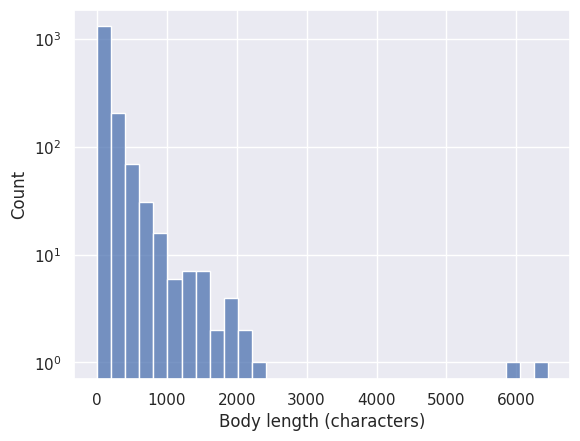

In [13]:
lengths = df[BODY].map(len)
ax = sns.histplot(
    lengths[lengths <= 10000],
    binwidth=200,
    # log_scale=True
)
ax.set(xlabel = "Body length (characters)")
ax.set(yscale = "log");

In [14]:
df[lengths >= 10000]

,id,time,sr_name,author_id,parent_fullname,post_id,upvotes,downvotes,body


### Graphing distribution over time

<Axes: xlabel='time', ylabel='Count'>

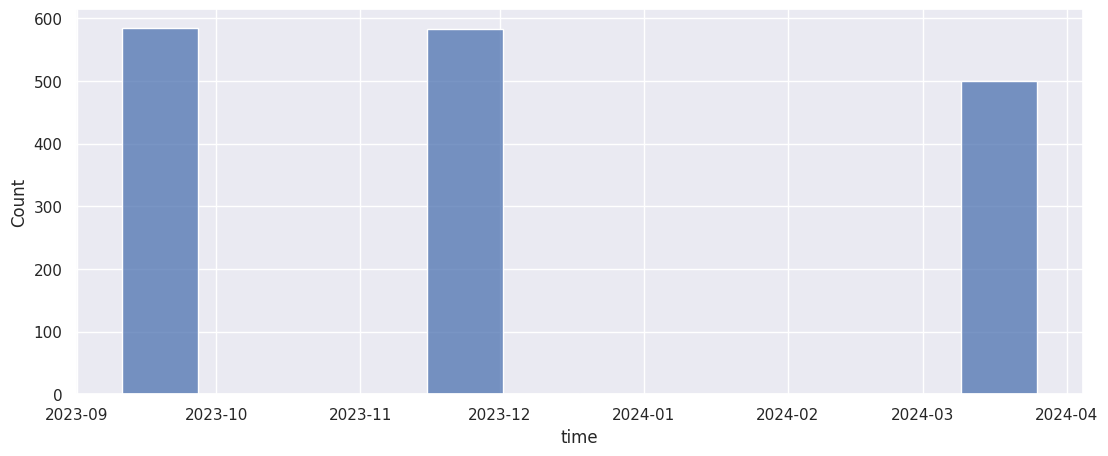

In [15]:
from datetime import timedelta

plt.figure(figsize=(13, 5))
# TODO figure out how to get binwidth to work with timedeltas
sns.histplot(data=df, x=TIME) #, binwidth=timedelta(days=30))

<Axes: xlabel='time', ylabel='Count'>

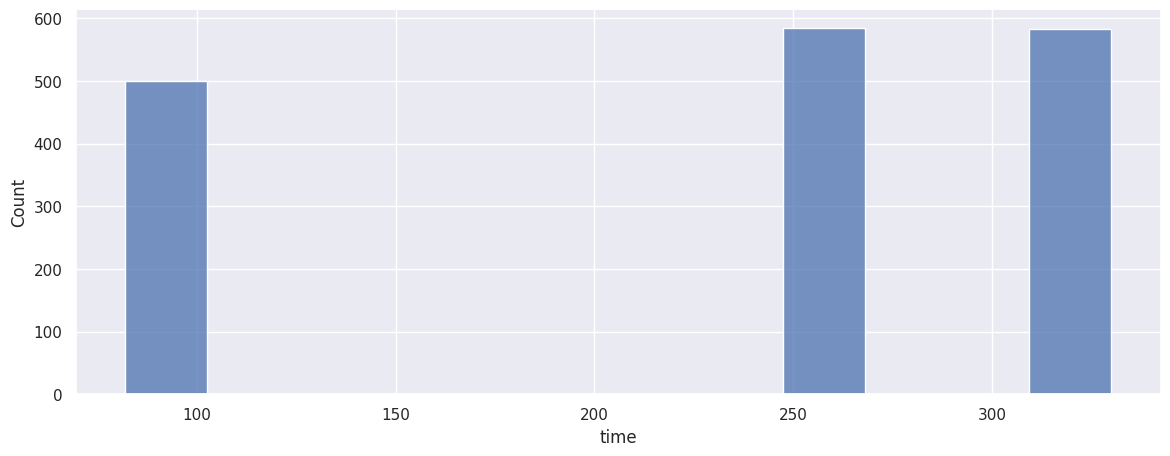

In [16]:
# Number of comments by day of year
plt.figure(figsize=(14, 5))
sns.histplot(data=df[TIME].apply(lambda t: int(t.strftime("%j"))))

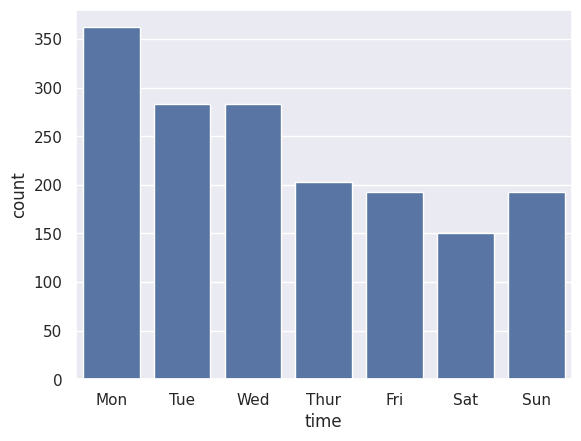

In [17]:
# Number of comments by day of week (0 = Monday)
g = sns.barplot(data=df[TIME].apply(lambda t: t.weekday()).value_counts())
g.set_xticks(
    g.get_xticks(),
    labels=[
        ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"][tick]
        for tick in g.get_xticks()
    ],
);

### Are the IDs uniformly distributed?

Figure out if the IDs are uniformly distributed using the Kolmogorov-Smirnov test

TODO check if KS is the right test to use here. Alternatives (not sure if any of these are even applicable):
- Chi-square (we don't have a normal distribution though)
- Mann-Whitney U test
- Anderson-Darling

The fact that we're taking the first gotten comment as the start rather than the actual requested
start ID might screw things up but whatever

<Axes: xlabel='id', ylabel='Count'>

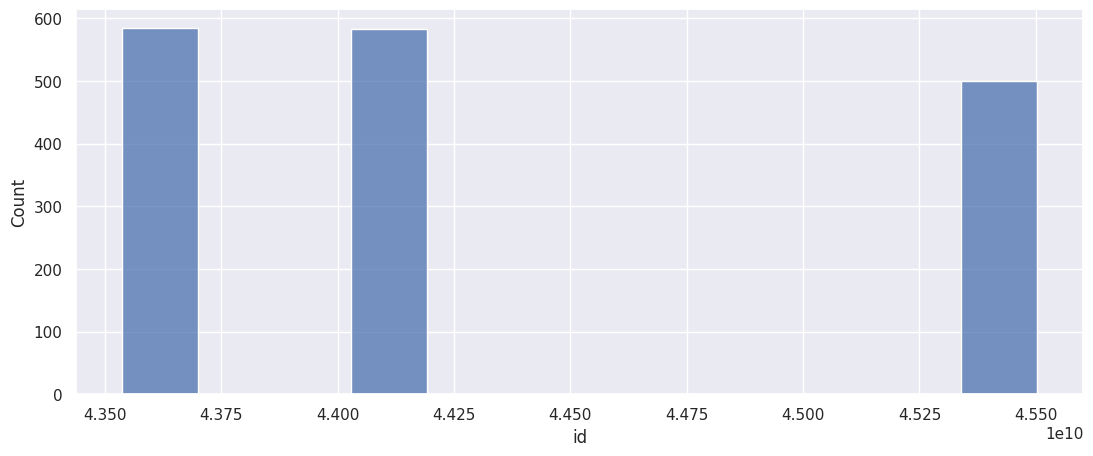

In [18]:
# Distribution of IDs

plt.figure(figsize=(13, 5))
sns.histplot(data=df[ID])

In [19]:
from scipy import stats

# Choose alpha of 0.05

ids_normalized = df[ID].map(lambda id: (id - first_id_actual) / (last_id - first_id_actual))
res = stats.ks_1samp(ids_normalized, stats.uniform.cdf)
if res.pvalue < 0.05:
    print("IDs are probably not uniformly distributed")
else:
    print("IDs are probably uniformly distributed")
res

NameError: name 'last_id' is not defined

In [ ]:
# The earliest comment we have
df[df[ID] == df[ID].min()]

,id,time,sr_name,author_id,parent_fullname,post_id,upvotes,downvotes,body
0,43535679895,2023-09-10 14:35:57,itookapicture,9zxaw2zhs,t3_16f7sey,t3_16f7sey,2,0,april 2022 23:52 after the tyson fury fight


<Axes: >

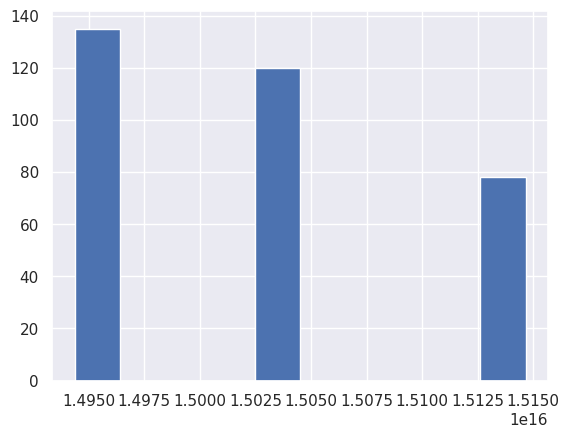

In [21]:
misses.hist()

In [22]:
plt.figure(figsize=(15, 5))
misses_actual = misses[misses >= first_id_actual]
sns.histplot(misses_actual, binwidth=1e8)

KeyboardInterrupt: 

<Axes: ylabel='Count'>

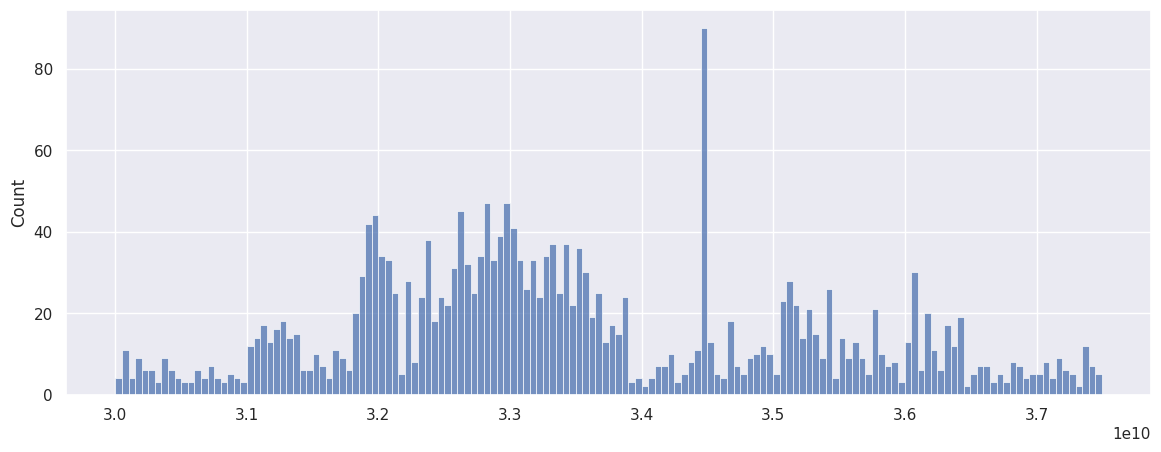

In [ ]:
# Zoom in on the middle
# Note: The counts won't match the ones above because the bin width is different

# TODO How are you supposed to filter a series?
weirdos = misses[lambda id: id <= 3.75e10][lambda id: 3e10 <= id]

plt.figure(figsize=(14, 5))
sns.histplot(weirdos, binwidth=5e7)

In [ ]:
# What portion of the requests we made actually returned something?
all = len(df) / (len(df) + len(misses))
# Same as above, but don't include requests for comments with IDs that were too low
exclude_invalid = len(df) / (len(df) + len(misses_actual))

all, exclude_invalid

(0.5307616707616708, 0.9425120857257544)

<Axes: xlabel='id', ylabel='rate'>

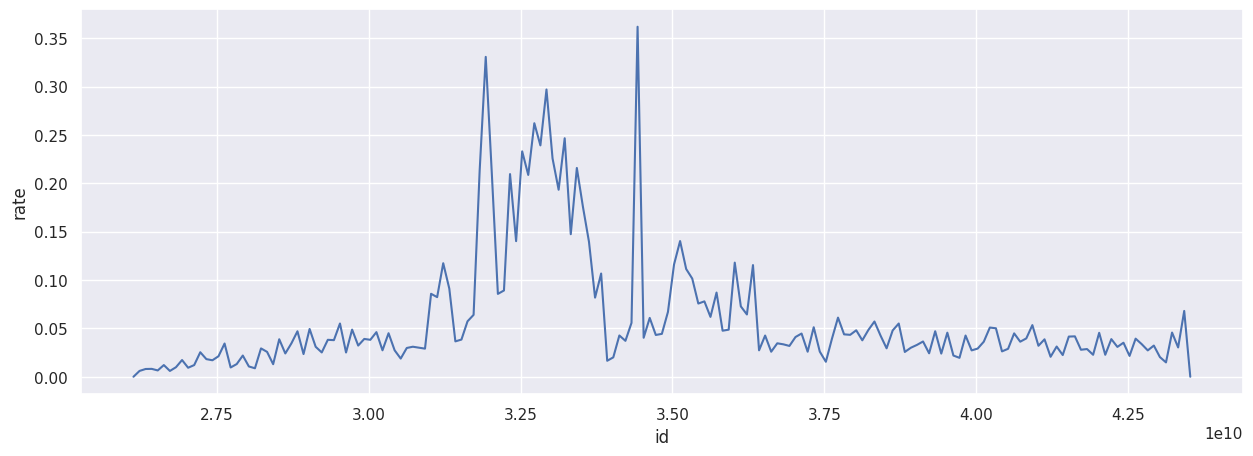

In [ ]:
# Hit rate over time
start = first_id_actual
end = max(df.iloc[len(df) - 1][ID],
          misses.loc[len(misses) - 1])
step = int(1e8)

def get_rate(curr_id):
    next_id = curr_id + step
    hits = len(df[(curr_id <= df[ID]) & (df[ID] < next_id)])
    num_misses = len(misses[lambda id: curr_id <= id][lambda id: id < next_id])

    if num_misses == 0:
        return 0
    return num_misses / (hits + num_misses)

ids = np.arange(start, end, step)
rates = np.fromiter(map(get_rate, ids), dtype=np.dtype(np.float64))

rate_df = pd.DataFrame({ "ID": ids, "rate": rates })

plt.figure(figsize=(15, 5))
sns.lineplot(data=rate_df, x="id", y="rate")

In [ ]:
df[(3e10 <= df[ID]) & (df[ID] < 3.75e10)]

,name,subreddit,time,body,id
24492,ds58nip,streetwear,2018-01-03 15:55:01,But /u/robonoodle looks much much less like a ...,30000025105
24493,ds5aaqf,sex,2018-01-03 16:21:04,Until death...,30000101847
24494,ds5ewhf,ockytop,2018-01-03 17:37:27,"Kamara consistently called out, had signature ...",30000316659
24495,ds5lihp,EDC,2018-01-03 19:42:40,"That's awesome, good eye for a cool use!",30000625117
24496,ds5m8wm,harrypotter,2018-01-03 19:57:16,"I like that reason though, it feels a little m...",30000659350
...,...,...,...,...,...
66230,h868wzx,prettyaltgirls,2021-08-08 10:37:43,;),37499522829
66231,h86ad6z,miraculousladybug,2021-08-08 10:49:38,Stormy Weather and Evillustrator had cool designs,37499590475
66232,h86as66,Gunners,2021-08-08 10:53:01,"Saliba sees the way out now, he is happy",37499609886
66233,h86c5oi,serbia,2021-08-08 11:04:13,"Nedeljom je drugačiji raspored vožnje, moguće ...",37499674050


In [ ]:
from scipy import stats

# Choose alpha of 0.05

misses_normalized = misses_actual.map(
    lambda id: (id - misses_actual.mean()) / (misses_actual.std())
)
res = stats.ks_1samp(misses_normalized, stats.norm.cdf)
if res.pvalue < 0.05:
    print("Misses are probably not normally distributed")
else:
    print("Misses could be normally distributed")
res

Misses are probably not normally distributed


KstestResult(statistic=0.12137782532388652, pvalue=9.498360451644489e-43, statistic_location=-0.19669160654014647, statistic_sign=1)

## Subreddits

In [ ]:
df[df[SR_NAME] == "reddit.com"]

,index,name,subreddit,time,body,id
0,91535,c02m7ii,reddit.com,2007-12-07 11:14:13,"London doesn't do it with every street, and th...",26125783434
2,101518,c031764,reddit.com,2008-01-30 00:31:42,because it takes all day to vote?,26126482828
3,75169,c035sd1,reddit.com,2008-02-12 08:22:36,"I doubt this will happen, the ISPs will fight ...",26126696917
4,103066,c03e4tj,reddit.com,2008-03-08 19:29:46,I thought the same when I finished the story a...,26127086311
7,97189,c03lq7n,reddit.com,2008-04-01 18:21:39,What does one of hip-hop's most [illustrious p...,26127440627
8,94094,c03tl2a,reddit.com,2008-04-25 10:34:06,The guys they killed all had rap sheets. I do...,26127807202
11,96050,c04bp9c,reddit.com,2008-06-11 22:06:21,"the dad is ""fucked""? maybe he shouldn't have ...",26128652448
12,99116,c04gzsw,reddit.com,2008-06-25 02:31:59,I hope so.,26128899392
13,59575,c04ifpz,reddit.com,2008-06-28 06:09:58,"He ""wants to attack Iran""? Uh. Source please....",26128966679
15,78079,c04qtpi,reddit.com,2008-07-18 19:13:36,this pope is none of that. he is RESPONSIBLE f...,26129358054


In [ ]:
# Most popular subreddits
df[SR_NAME].value_counts().nlargest(20)

subreddit
AskReddit          5059
politics           1141
funny               747
pics                706
nba                 702
worldnews           691
teenagers           682
nfl                 647
memes               632
gaming              616
soccer              605
AmItheAsshole       595
leagueoflegends     562
news                452
wallstreetbets      440
todayilearned       430
SquaredCircle       404
videos              377
movies              375
hockey              345
Name: count, dtype: int64